# Ridge Regression 

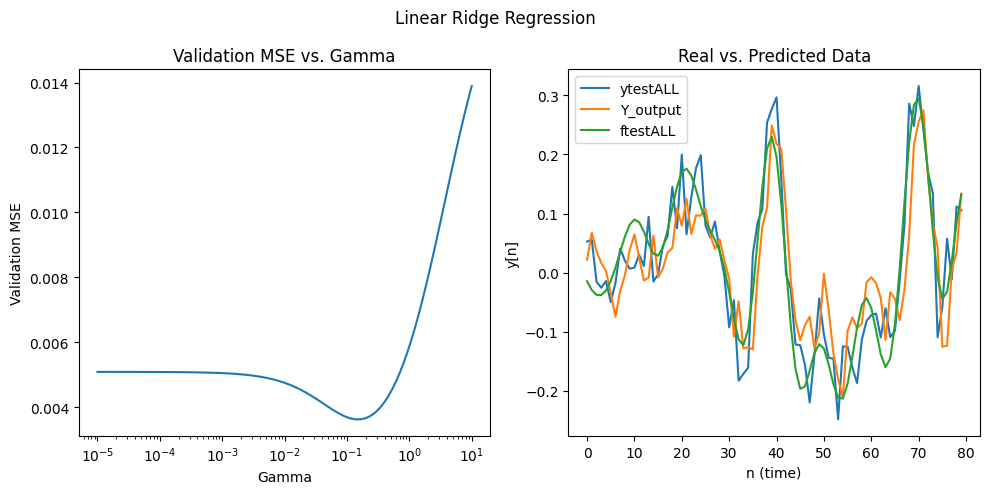

Best gamma value: 0.1519911082952933
Optimal Validation MSE for Linear Ridge Regression: 0.003619862658862302
Test MSE for Linear Ridge Regression: 0.005608313225702716


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset
data = pd.read_csv('data.csv')

## Splitting the data
#Column 1: ftest (test regressors without noise)
# Column 2: ftrain (train regressors without noise)
# Columns 3-21: Xtest 
# Columns 22-40: Xtrain 
# Column 41: ytest
# Colun 42: ytrain 
# According 
ftestALL = data.iloc[:, 0] # ftest regressors without noise, column 1
ftrainALL = data.iloc[:, 1] # ftrain regressors without noise, column 2
xtestALL = data.iloc[:, 2:21] # Xtest regressors with noise, columns
xtrainALL = data.iloc[:, 21:40] # Xtrain regressors with noise, columns 22-40
ytestALL = data.iloc[:, 40] # ytest regressand, column 41
ytrainALL = data.iloc[:, 41] # ytrain regressand, column 42

# Splitting xtestALL and ytestALL into 80% training and 20% test data
Xtr = xtrainALL.iloc[0:64] # 80% of Xtrain regressors with noise, rows 0-64
Xval = xtrainALL.iloc[65:] # 20% of Xtrain regressors as the validation data, rows 65-80
Ytr = ytrainALL.iloc[0:64] # 80% of ytrain regressand, rows 0-64
Yval = ytrainALL.iloc[65:] # 20% of ytrain regressand as the validation data, rows 65-80

## Linear Ridge Regression
gamma_values = np.logspace(-5,1,100) # defining a range of gamma values -2 to 2 with 100 values
mse_values = [] # empty list to store the MSE values
for gamma in gamma_values:
    ridge_model = Ridge(alpha=gamma)
    ridge_model.fit(Xtr, Ytr)
    Yval_pred_ridge = ridge_model.predict(Xval)
    mse_test_ridge = mean_squared_error(Yval, Yval_pred_ridge)
    mse_values.append(mse_test_ridge)

## Find the best gamma value
best_gamma = gamma_values[np.argmin(mse_values)]


## Train the model with the best gamma value on the entire training set
ridge_model = Ridge(alpha=best_gamma)
ridge_model.fit(Xtr, Ytr)
best_weights = ridge_model.coef_
Y_output = np.dot(best_weights.T, xtestALL.T)
mse_test_ridge = mean_squared_error(ytestALL, Y_output)

## Plot the results
plt.figure(figsize=(10, 5))
plt.suptitle('Linear Ridge Regression')

# Validation MSE vs. Gamma
plt.subplot(1, 2, 1)
plt.semilogx(gamma_values, mse_values)
plt.xlabel('Gamma')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs. Gamma')

# Compare real y[n] and predicted data
plt.subplot(1, 2, 2)
# plotting a line graph of ytestALL, Y_output, and ftestALL
plt.plot(ytestALL, label='ytestALL')
plt.plot(Y_output, label='Y_output')
plt.plot(ftestALL, label='ftestALL')
plt.xlabel('n (time)')
plt.ylabel('y[n]')
plt.title('Real vs. Predicted Data')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best gamma value: {best_gamma}")
print(f"Optimal Validation MSE for Linear Ridge Regression: {min(mse_values)}")
print(f"Test MSE for Linear Ridge Regression: {mse_test_ridge}")



# Epsilon-SVR


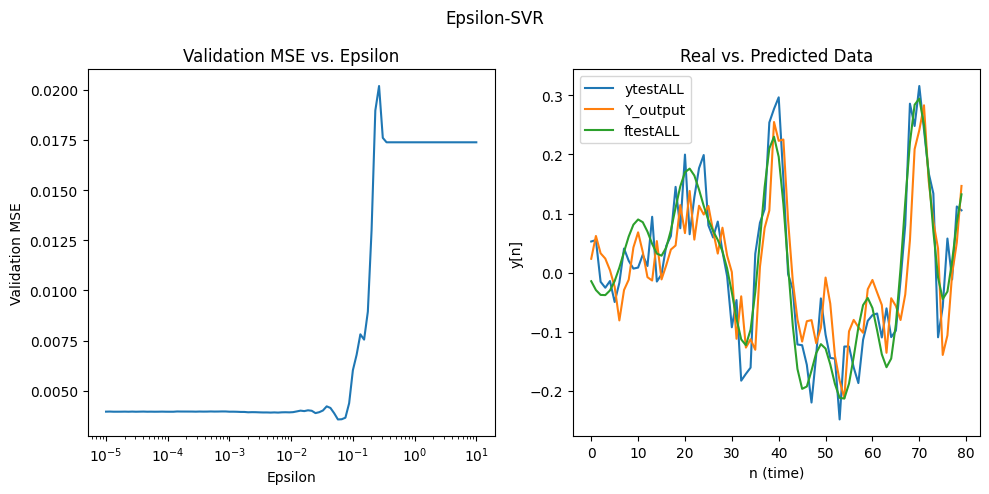

Best epsilon value: 0.0572236765935022
Optimal Validation MSE for Epsilon-SVR: 0.0035642644664144528
Test MSE for Epsilon-SVR: 0.01738531636986659


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset
data = pd.read_csv('data.csv')

## Splitting the data
#Column 1: ftest (test regressors without noise)
# Column 2: ftrain (train regressors without noise)
# Columns 3-21: Xtest 
# Columns 22-40: Xtrain 
# Column 41: ytest
# Colun 42: ytrain 
ftestALL = data.iloc[:, 0] # ftest regressors without noise, column 1
ftrainALL = data.iloc[:, 1] # ftrain regressors without noise, column 2
xtestALL = data.iloc[:, 2:21] # Xtest regressors with noise, columns
xtrainALL = data.iloc[:, 21:40] # Xtrain regressors with noise, columns 22-40
ytestALL = data.iloc[:, 40] # ytest regressand, column 41
ytrainALL = data.iloc[:, 41] # ytrain regressand, column 42

# Splitting xtestALL and ytestALL into 80% training and 20% test data
Xtr = xtrainALL.iloc[0:64] # 80% of Xtrain regressors with noise, rows 0-64
Xval = xtrainALL.iloc[65:] # 20% of Xtrain regressors as the validation data, rows 65-80
Ytr = ytrainALL.iloc[0:64] # 80% of ytrain regressand, rows 0-64
Yval = ytrainALL.iloc[65:] # 20% of ytrain regressand as the validation data, rows 65-80

## Epislon-SVR
epsilon_values = np.logspace(-5,1,100) # defining a range of epsilon values -5 to 1 with 100 values
mse_values = [] # empty list to store the MSE values
for epsilon in epsilon_values:
    epsilon_svr_model = SVR(epsilon=epsilon, kernel='linear')
    epsilon_svr_model.fit(Xtr, Ytr)
    Yval_pred_epsilon_svr = epsilon_svr_model.predict(Xval)
    mse_test_epsilon_svr = mean_squared_error(Yval, Yval_pred_epsilon_svr)
    mse_values.append(mse_test_epsilon_svr)

## Find the best Epsilon value
best_epsilon = epsilon_values[np.argmin(mse_values)]


## Train the model with the best Epsilon value on the entire training set
epsilon_svr_model = SVR(epsilon=best_epsilon, kernel='linear')
epsilon_svr_model.fit(Xtr, Ytr)
best_weights = epsilon_svr_model.coef_
Y_output = np.dot(best_weights, xtestALL.T).ravel()


## Plot the results
plt.figure(figsize=(10, 5))
plt.suptitle('Epsilon-SVR')

# Validation MSE vs. Epsilon
plt.subplot(1, 2, 1)
plt.semilogx(epsilon_values, mse_values)
plt.xlabel('Epsilon')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs. Epsilon')

# Compare real y[n] and predicted data
plt.subplot(1, 2, 2)
# plotting a line graph of ytestALL, Y_output, and ftestALL
plt.plot(ytestALL, label='ytestALL')
plt.plot(Y_output, label='Y_output')
plt.plot(ftestALL, label='ftestALL')
plt.xlabel('n (time)')
plt.ylabel('y[n]')
plt.title('Real vs. Predicted Data')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best epsilon value: {best_epsilon}")
print(f"Optimal Validation MSE for Epsilon-SVR: {min(mse_values)}")
print(f"Test MSE for Epsilon-SVR: {mse_test_epsilon_svr}")

# nu-SVR

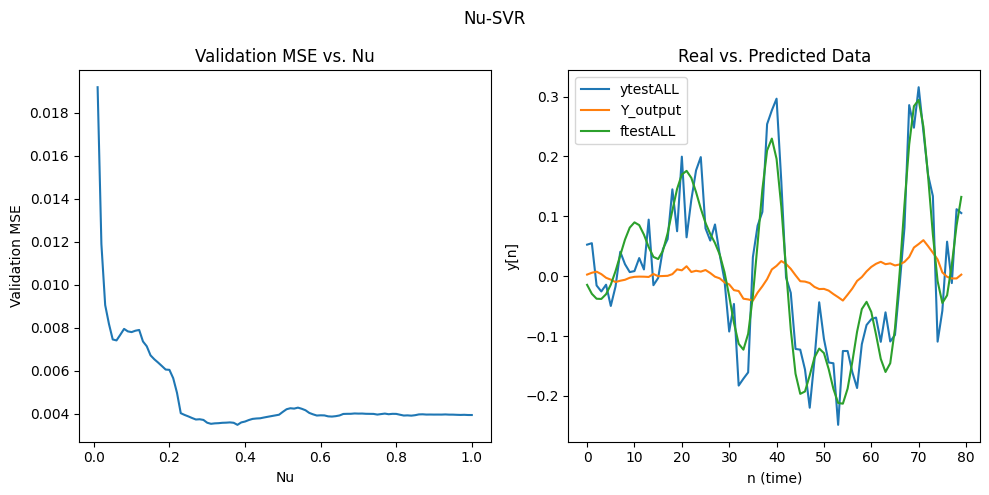

Best Nu value: 0.003487002342281486
Optimal Validation MSE for Nu-SVR: 0.003487002342281486
Test MSE for Nu-SVR: 0.01738531636986659


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset
data = pd.read_csv('data.csv')

## Splitting the data
#Column 1: ftest (test regressors without noise)
# Column 2: ftrain (train regressors without noise)
# Columns 3-21: Xtest 
# Columns 22-40: Xtrain 
# Column 41: ytest
# Colun 42: ytrain 
ftestALL = data.iloc[:, 0] # ftest regressors without noise, column 1
ftrainALL = data.iloc[:, 1] # ftrain regressors without noise, column 2
xtestALL = data.iloc[:, 2:21] # Xtest regressors with noise, columns
xtrainALL = data.iloc[:, 21:40] # Xtrain regressors with noise, columns 22-40
ytestALL = data.iloc[:, 40] # ytest regressand, column 41
ytrainALL = data.iloc[:, 41] # ytrain regressand, column 42

# Splitting xtestALL and ytestALL into 80% training and 20% test data
Xtr = xtrainALL.iloc[0:64] # 80% of Xtrain regressors with noise, rows 0-64
Xval = xtrainALL.iloc[65:] # 20% of Xtrain regressors as the validation data, rows 65-80
Ytr = ytrainALL.iloc[0:64] # 80% of ytrain regressand, rows 0-64
Yval = ytrainALL.iloc[65:] # 20% of ytrain regressand as the validation data, rows 65-80

## Nu-SVR
nu_values = np.linspace(0.01, 1, 100) # defining a range of nu values 0.01 to 1 with 100 values
mse_values = [] # empty list to store the MSE values
for nu in nu_values:
    nu_svr_model = NuSVR(nu=nu, kernel='linear')
    nu_svr_model.fit(Xtr, Ytr)
    Yval_pred_nu_svr = nu_svr_model.predict(Xval)
    mse_test_nu_svr = mean_squared_error(Yval, Yval_pred_nu_svr)
    mse_values.append(mse_test_nu_svr)

## Find the best Nu value
best_nu = mse_values[np.argmin(mse_values)]


## Train the model with the best Nu value on the entire training set
nu_svr_model = NuSVR(nu=best_nu, kernel='linear')
nu_svr_model.fit(Xtr, Ytr)
best_weights = nu_svr_model.coef_
Y_output = np.dot(best_weights, xtestALL.T).ravel()

## Plot the results
plt.figure(figsize=(10, 5))
plt.suptitle('Nu-SVR')

# Validation MSE vs. Nu
plt.subplot(1, 2, 1)
plt.plot(nu_values, mse_values)
plt.xlabel('Nu')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs. Nu')

# Compare real y[n] and predicted data
plt.subplot(1, 2, 2)
# plotting a line graph of ytestALL, Y_output, and ftestALL
plt.plot(ytestALL, label='ytestALL')
plt.plot(Y_output, label='Y_output')
plt.plot(ftestALL, label='ftestALL')
plt.xlabel('n (time)')
plt.ylabel('y[n]')
plt.title('Real vs. Predicted Data')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best Nu value: {best_nu}")
print(f"Optimal Validation MSE for Nu-SVR: {min(mse_values)}")
print(f"Test MSE for Nu-SVR: {mse_test_epsilon_svr}")